In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed0
# For example, here's several helpful packages to load in 
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
#from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D,UpSampling1D, UpSampling2D,UpSampling3D, Softmax, Add, Flatten, Activation , Dropout
from keras import backend as K
from keras.optimizers import Adam, Adamax,SGD
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:/UFS/F2 - Copia/database"))

# Any results you write to the current directory are saved as output.

['mitbih_test.csv', 'mitbih_test.csv.zip', 'mitbih_train.csv', 'mitbih_train.csv.zip', 'ptbdb_abnormal.csv', 'ptbdb_abnormal.csv.zip', 'ptbdb_normal.csv', 'ptbdb_normal.csv.zip']


In [118]:
train_df = pd.read_csv("D:/UFS/F2 - Copia/database/mitbih_train.csv", header=None)
test_df = pd.read_csv("D:/UFS/F2 - Copia/database/mitbih_test.csv", header=None)
#df = pd.concat([df, df2], axis=0)

In [119]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
train_df.info()
dataset_row = train_df.shape[0]
dataset_size= int(dataset_row/5)
print(dataset_size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
17510


In [121]:
train_df[187]=train_df[187].astype(int)
equilibre= train_df[187].value_counts()
print(equilibre)



0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


In [122]:
train_df[187].value_counts()
equilibre = train_df[187].value_counts()

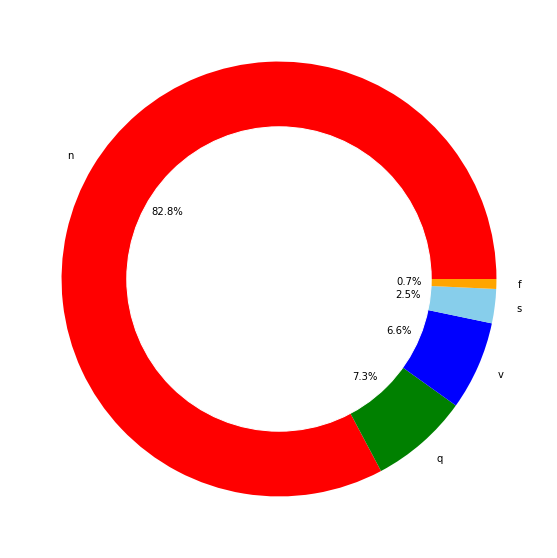

In [123]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [124]:
from sklearn.utils import resample
k=72471
#dataset_size= 2000
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=dataset_size,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=dataset_size,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=dataset_size,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=dataset_size,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=dataset_size,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [125]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    17510
1    17510
2    17510
3    17510
4    17510
Name: 187, dtype: int64


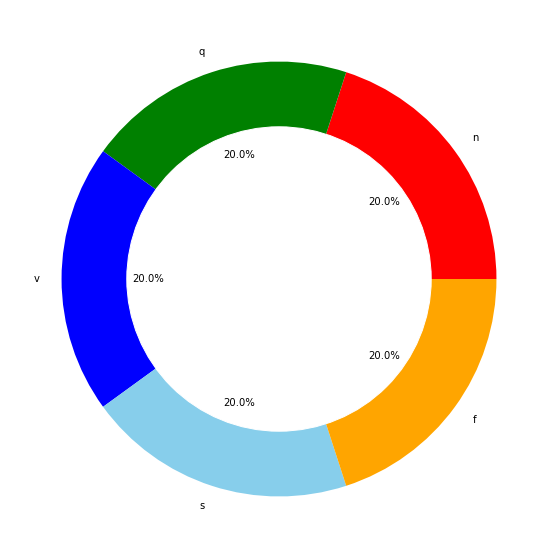

In [126]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [127]:
M = train_df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

In [128]:
#del train_df
#del test_df
#del M

In [129]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)


In [130]:
#tempo=c.iloc[0,:186]
#bruiter=add_gaussian_noise(tempo)

#plt.subplot(2,1,1)
#plt.plot(c.iloc[0,:186])

#plt.subplot(2,1,2)
#plt.plot(bruiter)

#plt.show()



In [131]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [132]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [133]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

# Data augmentation

To train properly the model, we sould have to augment all data to the same level. Nevertheless, for a first try, we will just augment the smallest class to the same level as class 1. With that we will be able to have a test set of around 5x800 observations.

# Split

In [134]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (87550, 186, 1)
y_train (87550, 5)
X_test (21892, 186, 1)
y_test (21892, 5)


# Model

Now let's re-create the model from the ArXiv Document

In [135]:
n_obs, feature, depth = X_train.shape
batch_size = 1500
#batch_size = 500

In [142]:
K.clear_session()

inp = Input(shape=(feature, depth))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)
C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S21)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)


In [145]:

#---Decoding-------------------
UC11 = Conv1D(filters=32, kernel_size=5, strides=2, padding='same')(M51)
UA11 = Activation("relu")(UC11)
UC12 = Conv1D(filters=32, kernel_size=5, strides=2, padding='same')(UA11)
US11 = Add()([UC12,M51 ])
UA12 = Activation("relu")(US11)
UM11 =UpSampling1D(size= (4))(UA12)


UC21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UM11)
UA21 = Activation("relu")(UC21)
UC22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UA21)
US21 = Add()([UC22, UM11])
UA22 = Activation("relu")(US21)
UM21 =UpSampling1D()(UA22)


UC31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UM21)
UA31 = Activation("relu")(UC31)
UC32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UA31)
US31 = Add()([UC32, UM21])
UA32 = Activation("relu")(US31)
UM31 =UpSampling1D()(UA32)


UC41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UM31)
UA41 = Activation("relu")(UC41)
UC42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UA41)
US41 = Add()([UC42, UM31])
UA42 = Activation("relu")(US41)
UM41 =UpSampling1D()(UA42)


UC51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UM41)
UA51 = Activation("relu")(UC51)
UC52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(UA51)
US51 = Add()([UC52, UM41])
UA52 = Activation("relu")(US51)
UM51 =UpSampling1D()(UA52)

M52 = (Dropout(0.25))(UM51)

F1 = Flatten()(M52)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 186, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 182, 32)      192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 182, 32)      5152        ['conv1d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 182, 32)      0           ['conv1d_1[0][0]']               
                                                                                              

In [146]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)

In [147]:
#adam = SGD(learning_rate = 0.01)
adam = Adamax(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [148]:
#model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [151]:
model.compile(loss= 'categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                                epochs=100, 
                                batch_size=2500, 
                                verbose=2, 
                                validation_data=(X_test, y_test), 
                                callbacks=[lrate])

Epoch 1/100
36/36 - 273s - loss: 1.7618 - accuracy: 0.1974 - val_loss: 1.6170 - val_accuracy: 0.0268 - lr: 0.0010 - 273s/epoch - 8s/step
Epoch 2/100
36/36 - 131s - loss: 1.6040 - accuracy: 0.2110 - val_loss: 1.5699 - val_accuracy: 0.0756 - lr: 0.0010 - 131s/epoch - 4s/step
Epoch 3/100
36/36 - 96s - loss: 1.5405 - accuracy: 0.2933 - val_loss: 1.5629 - val_accuracy: 0.0756 - lr: 0.0010 - 96s/epoch - 3s/step
Epoch 4/100
36/36 - 98s - loss: 1.4377 - accuracy: 0.3698 - val_loss: 1.6495 - val_accuracy: 0.0790 - lr: 0.0010 - 98s/epoch - 3s/step
Epoch 5/100
36/36 - 102s - loss: 1.3693 - accuracy: 0.4034 - val_loss: 1.6074 - val_accuracy: 0.0650 - lr: 0.0010 - 102s/epoch - 3s/step
Epoch 6/100
36/36 - 95s - loss: 1.3152 - accuracy: 0.4420 - val_loss: 1.6266 - val_accuracy: 0.0647 - lr: 0.0010 - 95s/epoch - 3s/step
Epoch 7/100
36/36 - 96s - loss: 1.2573 - accuracy: 0.4710 - val_loss: 1.5397 - val_accuracy: 0.0719 - lr: 0.0010 - 96s/epoch - 3s/step
Epoch 8/100
36/36 - 97s - loss: 1.2365 - accuracy

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

labels = ["Normal",
          "Supraventricular ectopic beats",
          "Ventricular ectopic beats",
          "Fusion Beats",
          "Unknown Beats"]

In [153]:
# Test Model
predY = model.predict(X_test)
y_pred = np.argmax(predY,axis=1)
y_actual = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_actual, y_pred)
print(cm)

685/685 [==============================] - 13s 12ms/step
[[12016  2879   429  2090   704]
 [   89   409    12    37     9]
 [   87    57  1129   143    32]
 [   12     0     5   145     0]
 [   60    12    19    13  1504]]


In [154]:
print(classification_report(y_actual, y_pred, target_names=labels))

                                precision    recall  f1-score   support

                        Normal       0.98      0.66      0.79     18118
Supraventricular ectopic beats       0.12      0.74      0.21       556
     Ventricular ectopic beats       0.71      0.78      0.74      1448
                  Fusion Beats       0.06      0.90      0.11       162
                 Unknown Beats       0.67      0.94      0.78      1608

                      accuracy                           0.69     21892
                     macro avg       0.51      0.80      0.53     21892
                  weighted avg       0.91      0.69      0.77     21892



In [155]:
y_pred = model.predict(X_test, batch_size = 500)

44/44 [==============================] - 8s 102ms/step


In [156]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     18118
           1       0.12      0.74      0.21       556
           2       0.71      0.78      0.74      1448
           3       0.06      0.90      0.11       162
           4       0.67      0.94      0.78      1608

    accuracy                           0.69     21892
   macro avg       0.51      0.80      0.53     21892
weighted avg       0.91      0.69      0.77     21892



In [157]:
print("ranking-based average precision : {:.3f}".format(label_ranking_average_precision_score(y_test, y_pred)))
print("Ranking loss : {:.3f}".format(label_ranking_loss(y_test, y_pred)))
print("Coverage_error : {:.3f}".format(coverage_error(y_test, y_pred)))

ranking-based average precision : 0.833
Ranking loss : 0.100
Coverage_error : 1.398


Normalized confusion matrix


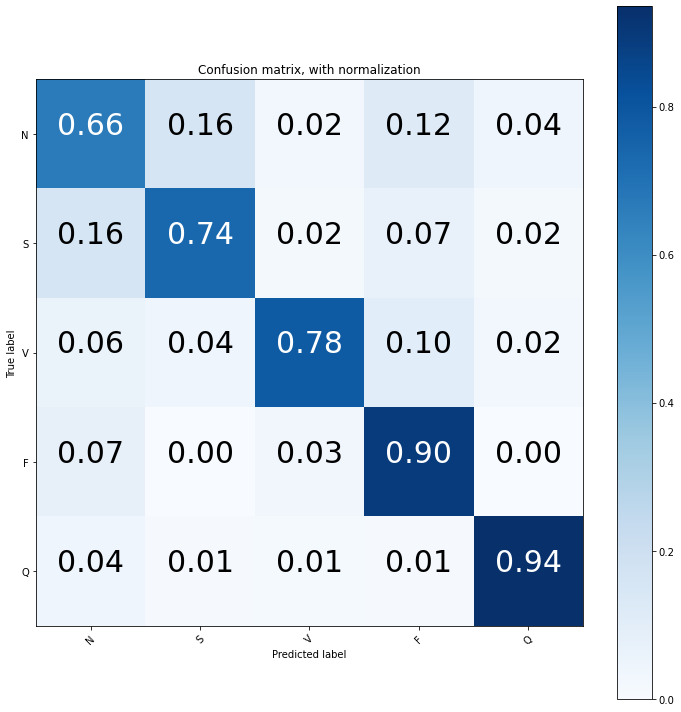

In [158]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [159]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
RECALL = TP/(TP+FN)
# Specificity or true negative rate
SPECIFICITY = TN/(TN+FP) 
# Precision or positive predictive value
PRECISION = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
#F1-score
F1 = 2*((RECALL*PRECISION)/(RECALL+PRECISION))

In [161]:
from statistics import mean, median
from tkinter import N
scores = model.evaluate((X_test), y_test, batch_size = 500)
scores2 = model.evaluate(X_test, y_pred, batch_size = 500)
print("Accuracy: %.2f%%" % (scores[0]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))
PRE = mean(PRECISION)
print("Precision: %.2f%%"% (PRE*100))
#print("Precision: ", PRECISION)
SPE = mean(SPECIFICITY)
print("Specificity: %.2f%%"% (SPE*100))
#print("Specificity", SPECIFICITY)
RE = mean(RECALL)
print("Recall :%.2f%%"% (RE*100))
#print("Recall", RECALL)
#print("F1: ", F1)
F1S = mean(F1)
print("F1-Score :%.2f%%"% (F1S*100))
Z= mean(1-FNR)*100
print("Recall:%.2f%%"%Z)

44/44 [==============================] - 6s 111ms/step - loss: 0.9331 - accuracy: 1.0000
Accuracy: 81.64%
Accuracy: 69.45%
Precision: 50.77%
Specificity: 92.63%
Recall :80.18%
F1-Score :52.68%
Recall:80.18%
